In [1]:
from adapters import ConfigUnion, PrefixTuningConfig, SeqBnConfig, LoRAConfig, MAMConfig, BnConfig, UniPELTConfig


models_to_test = ["nickmuchi/sec-bert-finetuned-finance-classification", "ProsusAI/finbert", "ahmedrachid/FinancialBERT-Sentiment-Analysis", "yiyanghkust/finbert-tone", "nickmuchi/deberta-v3-base-finetuned-finance-text-classification", "soleimanian/financial-roberta-large-sentiment", "bardsai/finance-sentiment-pl-fast", "RashidNLP/Finance-Sentiment-Classification", "siebert/sentiment-roberta-large-english", "kwang123/bert-sentiment-analysis", "distilbert/distilbert-base-uncased-finetuned-sst-2-english"]

adapter_config_list = [UniPELTConfig(), MAMConfig(), ConfigUnion(LoRAConfig(r=8, use_gating=True), PrefixTuningConfig(prefix_length=10, use_gating=True), SeqBnConfig(reduction_factor=16, use_gating=True)), ]

/Users/judi/Documents/Jonas/Advanced-Analytics-and-Machine-Learning/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/judi/Documents/Jonas/Advanced-Analytics-and-Machine-Learning/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
from build_model import CustomTransformerModel
from evaluate_model import ModelEvaluator

#stop warnings
import warnings
warnings.filterwarnings('ignore')

# Load the training and evaluation data

# List of [model_name, adapter_name, column_name] combinations
combinations = [
    ["bardsai/finance-sentiment-pl-fast", True, 'AnalystNoteList', adapter_config_list[2]]
    # Add more combinations as needed
]

# Load the training and evaluation data
train_df = pd.read_csv('1. data/final/train.csv')
dev_df = pd.read_csv('1. data/final/dev.csv')
test_df = pd.read_csv('1. data/final/test.csv')


for model_name, adapter, column_name, adapter_config in combinations:
    # Create an instance of CustomTransformerModel
    model = CustomTransformerModel(model_name=model_name, adapter=adapter, column_name=column_name, adapter_config=adapter_config)

    # Build the model
    model.build_model()

    # Train the model
    model.train(train_df, dev_df, test_df, epochs=1, batch_size=8, learning_rate=2e-2, seed=42, save_model=False)




100%|██████████| 138/138 [03:48<00:00,  1.66s/it]


{'train_runtime': 228.7297, 'train_samples_per_second': 4.822, 'train_steps_per_second': 0.603, 'train_loss': 0.8867178654325181, 'epoch': 1.0}


100%|██████████| 40/40 [00:25<00:00,  1.59it/s]


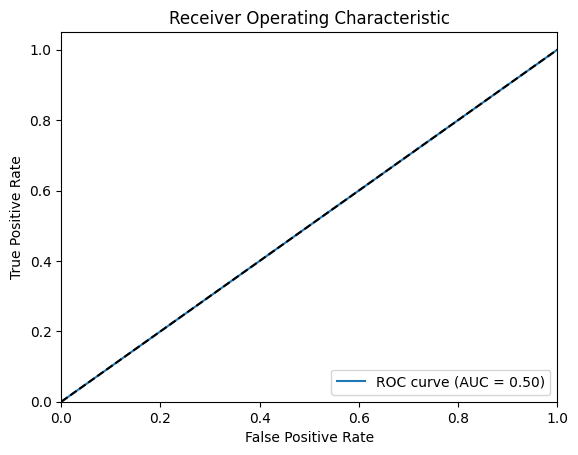

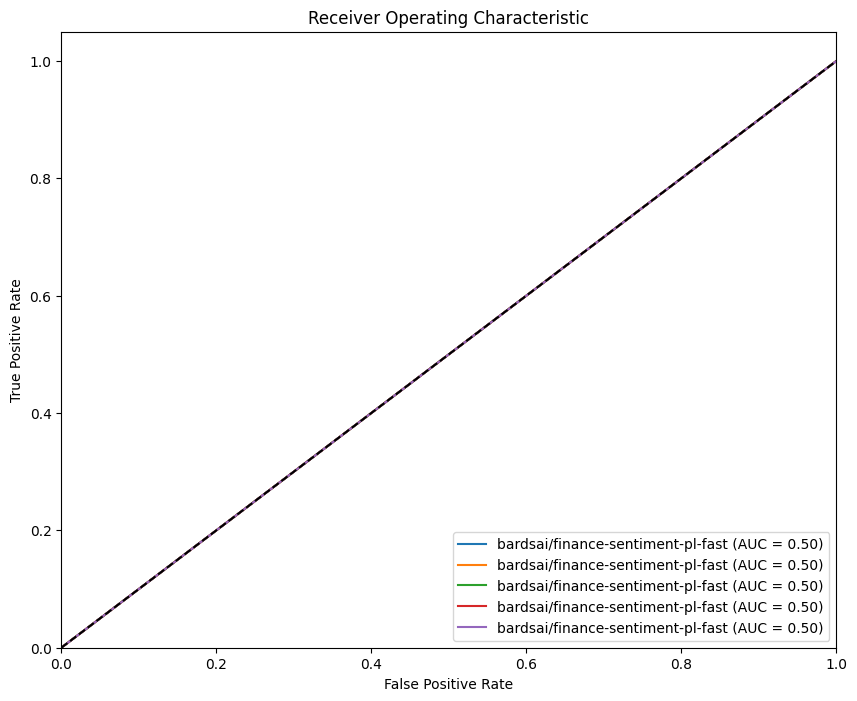

In [6]:
test_df = pd.read_csv('1. data/final/test.csv')
true_labels = test_df['Label']

# Create an instance of ModelEvaluator
evaluator = ModelEvaluator(true_labels, combinations)

# Evaluate the models
evaluator.evaluate()
evaluator.build_roc_curve(5)
